In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from functions import *

In [2]:
frame = cv2.imread('inputs/Tears_of_Steel_1080p/scene_2/frame0001.png')

In [36]:
def filter_squares(squares: np.array, horizontal_stride: int, vertical_stride: int) -> Union[np.array, np.array]:
    """
    Filter squares based on their indices:
    Start by setting a stride, which determines the size of a block group. E.g., stride 3 means blocks are grouped in 3 by 3.
    Then, choose which blocks from each group will be kept by setting the row and column from where to start counting.
    E.g., in a 3 stride context, (0, 0) will select each top left block in a group, (0, 1) each top center block, 
    (0, 2) each top right, (1, 0) center left, etc. For each block that needs to be kept, add a 2d tuple like just shown
    to the tuple of blocks_to_keep.

    Args:
    - squares: numpy array with shape [n, m, l, l, c] containing the squares

    Returns:
    - filtered_squares: numpy array with shape [n_filtered, m_filtered, l, l, c] containing the filtered squares
    - filter_mask: numpy array with shape [n, m] indicating which blocks were kept (1) or filtered out (0)
    """
    filter_mask = np.ones(squares.shape, dtype=int) * 255
    filter_mask[::horizontal_stride, -1::vertical_stride] = 0
    filtered_squares = squares[::horizontal_stride, ::vertical_stride]
    return filtered_squares, filter_mask

def process_frame_server_side(frame, square_size, vertical_stride, horizontal_stride):
    squared_frame = split_image_into_squares(frame, square_size)
    filtered_squares, mask_squares = filter_squares(squared_frame, vertical_stride, horizontal_stride)
    filtered_flattened = flatten_squares_into_image(filtered_squares)
    mask_flattened = flatten_squares_into_image(mask_squares)
    return filtered_flattened, mask_flattened

In [37]:
shrunk, mask = process_frame_server_side(frame, 16, -1, 1)

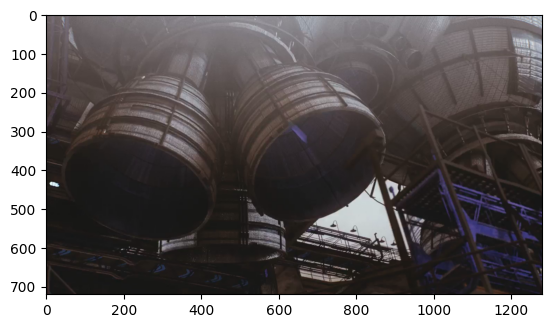

In [38]:
plt.imshow(frame)

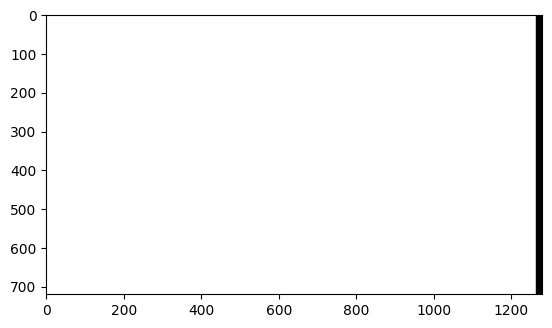

In [39]:
plt.imshow(mask)

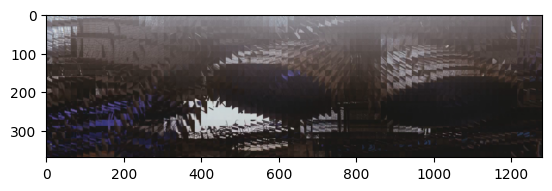

In [28]:
plt.imshow(shrunk)